<a href="https://colab.research.google.com/github/sergio615/Tarea-Crear_Red-nueronalIA/blob/main/RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importamos Librerias**

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# **Creamos el Dataset**

(500, 1)


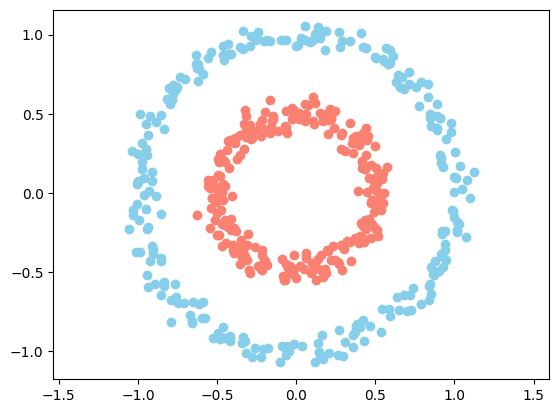

In [ ]:
n = 500 # Numero de registros del dataset
p = 2 # Cantidad de atributos del dataset

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05) # n_samples = numero de muestras, factor = Distancia entre los dos circulos, noise = Ruido agregado a los datos

Y = Y[:, np.newaxis]

print(Y.shape)
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue") # Se grafican punto del primer circulo de la clase1 en color azul cielo
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon") #Se grafican punto del primer circulo de la clase2 en color salmon
plt.axis("equal")
plt.show()

# **Clase de la Capa de la Red**

In [ ]:
class neural_layer (): # Clase "neural_layer" representa una capa de una red neuronal
  def __init__(self, n_conn, n_neur, act_f): #El método init de esta clase se utiliza para inicializar una nueva instancia, para esto toma tres parámetros: n_conn (número de conexiones de entrada), n_neur (número de neuronas en la capa actual) y act_f (función de activación para las neuronas de esta capa)
      self.act_f = act_f #Almacena la funcion de activacion

      self.b = np.random.rand(1, n_neur)*2-1 # Matriz que contiene los sesgos para cada neurona en la capa
      self.w = np.random.rand(n_conn, n_neur)*2-1 # Matriz que contiene los pesos de todas las conexiones entre la capa anterior y esta capa


# **Funciones de Activación**

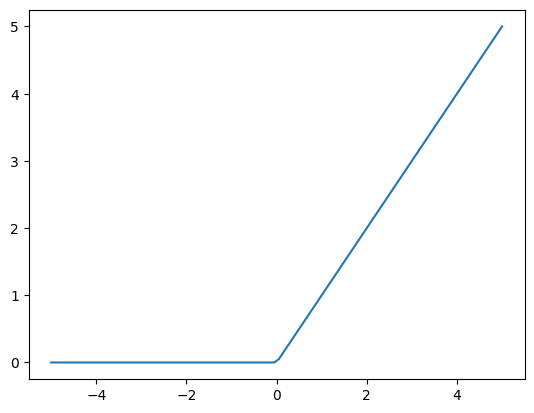

In [ ]:
sigm = (lambda x: 1 / (1 + np.e ** (-x)), # Formula de la función de activación sigmoidal
        lambda x: x * (1 -x))

relu = lambda x: np.maximum(0, x)# Función de activación Relu

_x = np.linspace(-5, 5, 100) # Rango entre -5 y 5 y genere 100 valores
plt.plot(_x, relu(_x)) # Grafica la función de activación ReLU

In [ ]:
def create_nn(topology, act_f): # Topology:Lista que describe la estructura de la red neuronal y act_f: función de activación que se utilizará en todas las capas de la red

  nn = [] # Almacena las capas de la red neuronal

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[1], topology[l+1], act_f))

  return nn



In [ ]:
topology = [p, 4, 8, 16, 8, 4, 1] # Número de neuronas en cada capa

neural_net = create_nn(topology, sigm) #crea la red neuronal con la topologia y la funcion descrita

l2_cost = (lambda Yp, Yr: np.mean((Yp -Yr) ** 2), # Función del error cuadratico medio (MSE)
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True): # La función "train" toma los datos de entrada, la salida esperada, la función de costo y un parametro de tasa de aprendizaje

 out = [(None, X)]

 # Forward Pass
 for l, layer in enumerate(neural_net):# Este bucle for itera en las capas de la red neuronal y realiza la propagación hacia adelante (forward pass)

        z = out[-1][1] @ neural_net[l].w + neural_net[l].b
        a = neural_net[l].act_f[0](z)

        out.append((z, a))


if train:

  # Backward pass
  delta = [] # Almacena los valores del  backpropagation

  for l in  reversed(range (0, len(neural_net))): # Este bucle if itera en orden inverso, comenzando desde la capa de salida hacia la capa de entrada

    z = out[l+1][0]
    a = out[l+1][1]

    print(a.shape)

    if l == len(neural_net) - 1:
      deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) # Formula del error de la ultima capa
    else:
      print(deltas[0].shape, _w.shape)
      deltas.insert(0, deltas[0] @_w.T * neural_net[l].act_f[1][a]) #Retropación del error a la capa anterior

      _w = neural_net[l].w

  # Gradient descent
    neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
    neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas [0] * lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)

SyntaxError: ignored

# **Entrenamos la Red**

In [ ]:
import time # Se utiliza para controlar el tiempo
from IPython.display import clear_output # Borra la salida del entorno

neural_n = create_nn(topology, sigm) # Almacena la Red neuronal creada

loss = [] #Almacena los valores de pérdida durante el entrenamiento

for i in range(1000):# Este bucle for se ejecuta 1000 veces para realizar el entrenamiento de la red neuronal durante 1000 iteraciones
  #Entrenamos la Red
  pY = train(neural_n, X, Y, l2_cost)

  if i % 25 == 0:
    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_net, np.array([[x0, x1]]), Y, l2_cost, train = false)[0][0]

  plt.pcolormesh(_x0, _x1, _Y, cmap ="coolwarm")
  plt.axis("equal")

  plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
  plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")

  clear_output(wait=True)
  plt.show()
  plt.plot(range(len(loss)), loss)
  plt.show()
  time.sleep(0.5)



ValueError: ignored